# Feature distances

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from kissim.comparison import FeatureDistancesGenerator

In [2]:
HERE = Path(_dh[-1])  # noqa: F821
RESULTS = HERE / "../../results/"

In [3]:
plt.style.use("seaborn")

## Load feature distances

In [4]:
%%time
feature_distances_generator = FeatureDistancesGenerator.from_csv(RESULTS / "feature_distances.csv")
print(len(feature_distances_generator.data))

12081070
CPU times: user 34.2 s, sys: 1.84 s, total: 36 s
Wall time: 39.2 s


In [5]:
columns = [f"d{i}" for i in range(1, len(feature_distances_generator.distances[0]) + 1)]
distances = pd.DataFrame(feature_distances_generator.distances, columns=columns)

## Feature distribution

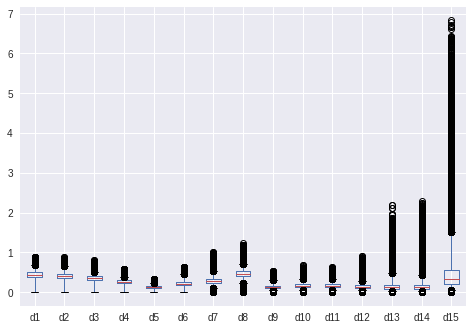

In [6]:
distances.plot(kind="box", whis=[1, 99]);

In [7]:
distances.isna().sum()

d1          0
d2          0
d3          0
d4          0
d5          0
d6          0
d7          0
d8          0
d9      44199
d10    297985
d11     44199
d12         0
d13         0
d14         0
d15         0
dtype: int64

In [8]:
distances[["d9", "d10", "d11"]].isna().sum(axis=1).value_counts()

0    11749128
1      287473
2       34497
3        9972
dtype: int64

## Feature weighting

In [9]:
weights_dict = {
    "100": [1.0 / 8] * 8 + [0] * 4 + [0] * 3,
    "010": [0] * 8 + [1.0 / 4] * 4 + [0] * 3,
    "001": [0] * 8 + [0] * 4 + [1.0 / 3] * 3,
    "110": [0.5 / 8] * 8 + [0.5 / 4] * 4 + [0] * 3,
    "101": [0.5 / 8] * 8 + [0] * 4 + [0.5 / 3] * 3,
    "011": [0] * 8 + [0.5 / 4] * 4 + [0.5 / 3] * 3,
    "111": [1.0 / 3 / 8] * 8 + [1.0 / 3 / 4] * 4 + [1.0 / 3 / 3] * 3,
    "15": [1 / 15] * 15,
}

In [10]:
weighted_distances_dict = {}

for weights_name, weights in weights_dict.items():
    weighted_distances = (
        weights[0] * distances["d1"]
        + weights[1] * distances["d2"]
        + weights[2] * distances["d3"]
        + weights[3] * distances["d4"]
        + weights[4] * distances["d5"]
        + weights[5] * distances["d6"]
        + weights[6] * distances["d7"]
        + weights[7] * distances["d8"]
        + weights[8] * distances["d9"]
        + weights[9] * distances["d10"]
        + weights[10] * distances["d11"]
        + weights[11] * distances["d12"]
        + weights[12] * distances["d13"]
        + weights[13] * distances["d14"]
        + weights[14] * distances["d15"]
    )
    weighted_distances_dict[weights_name] = weighted_distances

weighted_distances_df = pd.DataFrame(weighted_distances_dict)

In [11]:
weighted_distances_df.shape

(12081070, 8)

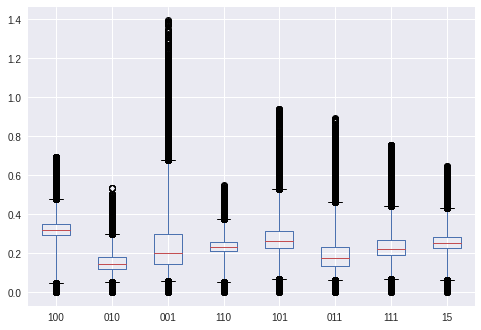

In [12]:
weighted_distances_df.plot(kind="box", whis=[1, 99]);